### Data Set Chosen:
I picked to analyze the titanic data to find out some facts about the tragedy.



### Questions:
•	How many were survived from the given data set? 
•	How many were male and female?
•	Was male population survived more or female?
•	What was the average of people travelling and what was the average age of the survivors?
•	Were the families (with siblings/spouses or parents/children) or elders or kids tried to be saved more?
•	What was the average traveler size in each Class and was there any significance to see if a specific class people were most of the survivors?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
titanic_data = pd.read_csv('titanic_data.csv')

In [3]:
titanic_data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,NaN,NaN,NaN
1,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,NaN,NaN,NaN
2,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,NaN,NaN,NaN
3,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,NaN,NaN,NaN
4,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,NaN,NaN,NaN


### Data Wrangling:
•	The total number of passengers from the given set was first collected.
•	Then I looked at the total number of passengers who were survived.
•	From them, I got the total number of male passengers and there by the total female.
•	Also, I tried to get the number of passengers in each Class.
•	Then the no. of passengers who had some sort of family travelling with them. I also looked at them per Class.
•	I calculated the average survivor’s age and the age of the maximum survivors.


### Exploration phase:
•	The total number of passengers from the given set was first collected.
•	Then I looked at the total number of passengers who were survived and the average of them from the total list.
•	
•	
•	From them, I got the total number of male survivors and there by the total female.
•	Also, I tried to get the number of passengers in each Class.
•	Then the no. of passengers who had some sort of family travelling with them. I also looked at them per Class.
•	I calculated the average survivor’s age and the age of the maximum survivors.

In [4]:
#Total Number of passengers from the given Data set.

len(titanic_data)

927

In [5]:
# Total survivors list from the CSV file. 
survived_df = titanic_data.loc[(titanic_data['Survived'] == 1)]
len(survived_df)

342

In [6]:
# this shows the percentage of survivors
titanic_data['Survived'].mean()

0.5818385650224215

This means that around 38% of the people survived. 

In [7]:
# - Calculating the male survivors from total list.
male_survivors = survived_df.loc[survived_df['Sex'] == 'male']
b = len(male_survivors)
print b

male_total = titanic_data.loc[titanic_data['Sex'] == 'male']
print len(male_total)

109
577


In [8]:
# Next finding out the survivors by gender
titanic_data.groupby('Sex').mean()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

This shows that only 18% of males were survivors which means majority of 74% were female passengers

In [9]:
# Finding out the survivors per class and grouped by gender
titanic_data.groupby(['Sex', 'Pclass'])[['Survived']].mean()


Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [10]:
# Average Survivor's age
avg_Age_survived = survived_df['Age'].mean()
print avg_Age_survived

28.3436896552


In [11]:
print male_survivors.head(5)



   PassengerId  Survived  Pclass                             Name   Sex   Age  \
0          804         1       3  Thomas, Master. Assad Alexander  male  0.42   
1          756         1       2        Hamalainen, Master. Viljo  male  0.67   
4           79         1       2    Caldwell, Master. Alden Gates  male  0.83   
5          832         1       2  Richards, Master. George Sibley  male  0.83   
6          306         1       1   Allison, Master. Hudson Trevor  male  0.92   

   SibSp  Parch  Ticket      Fare    Cabin Embarked  Unnamed: 12  Unnamed: 13  \
0      0      1    2625    8.5167      NaN        C          NaN          NaN   
1      1      1  250649   14.5000      NaN        S          NaN          NaN   
4      0      2  248738   29.0000      NaN        S          NaN          NaN   
5      1      1   29106   18.7500      NaN        S          NaN          NaN   
6      1      2  113781  151.5500  C22 C26        S          NaN          NaN   

   Unnamed: 14  
0        

In [12]:
# Calculating total number of female survivors from the already obtained total and male survivors' list.

female_survivors = survived_df.loc[survived_df['Sex'] == 'female']
a = len(female_survivors)
print a

233


In [13]:
# Checking data types for different columns
survived_df.dtypes

PassengerId    float64
Survived       float64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Unnamed: 12    float64
Unnamed: 13    float64
Unnamed: 14    float64
dtype: object

In [14]:
# - to group the survivors list by Pclass column

survived_df.groupby('Pclass').sum()['Survived']


Pclass
1    136
2     87
3    119
Name: Survived, dtype: float64

In [15]:
# to group the survivors list by Sibsp column

survived_df.groupby('SibSp').sum()['Survived']

SibSp
0    210
1    112
2     13
3      4
4      3
Name: Survived, dtype: float64

In [16]:
# - to group the survivors list by Parch column Class wise.
survived_df.groupby(['Parch']).sum()['Pclass']

Parch
0    453
1    129
2     75
3      7
5      3
Name: Pclass, dtype: float64

In [17]:
# sample to get see if the survivors list for a particular age
survived_df.loc[(survived_df['Age']==7)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12,Unnamed: 13,Unnamed: 14
49,536,1,2,"Hart, Miss. Eva Miriam",female,7,0,2,F.C.C. 13529,26.25,NaN,S,NaN,NaN,NaN


In [18]:
# - Group of survivors for each age and their details like Passenger ID, Pclass, Fare spent , SibSP, Parch
survived_df.groupby(['Age']).sum()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Unnamed: 12,Unnamed: 13,Unnamed: 14
Age,,,,,,,,,
0.42,804,1,3,0,1,8.5167,NaN,NaN,NaN
0.67,756,1,2,1,1,14.5000,NaN,NaN,NaN
0.75,1115,2,6,4,2,38.5166,NaN,NaN,NaN
0.83,911,2,4,1,3,47.7500,NaN,NaN,NaN
0.92,306,1,1,1,2,151.5500,NaN,NaN,NaN
1.00,2356,5,13,4,8,123.4542,NaN,NaN,NaN
2.00,1352,3,7,2,3,64.2875,NaN,NaN,NaN
3.00,1257,5,12,8,7,133.6167,NaN,NaN,NaN
4.00,3574,7,17,5,9,207.1333,NaN,NaN,NaN


### Data Visualisation:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

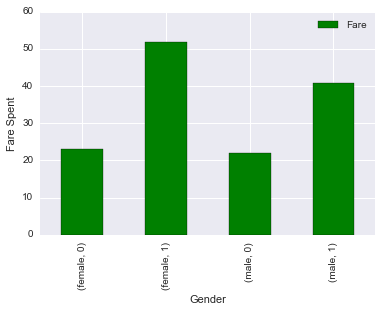

In [33]:
plot = titanic_data.groupby(['Sex', 'Survived'])[['Fare']].mean().plot(kind = 'bar', color = 'Green')
plot.set_xlabel('Gender')
plot.set_ylabel('Fare Spent')

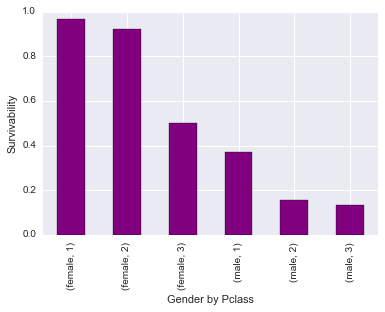

In [41]:
plot = titanic_data.groupby(['Sex', 'Pclass'])[['Survived']].mean().plot(kind = 'bar', legend = False, color = 'Purple')
plot.set_xlabel('Gender by Pclass')
plot.set_ylabel('Survivability')

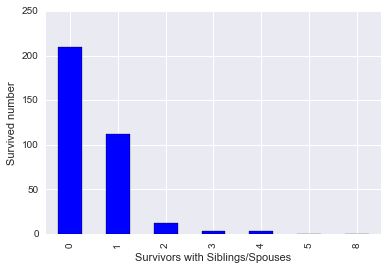

In [56]:
plot = titanic_data.groupby(['SibSp'])[['Survived']].sum().plot(kind = 'Bar', legend = False, color = 'Blue')
plot.set_xlabel('Survivors with Siblings/Spouses')
plot.set_ylabel('Survived number')

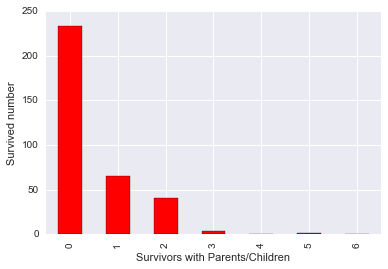

In [55]:
plot = titanic_data.groupby(['Parch'])[['Survived']].sum().plot(kind = 'Bar', legend = False, color = 'Red')
plot.set_xlabel('Survivors with Parents/Children')
plot.set_ylabel('Survived number')

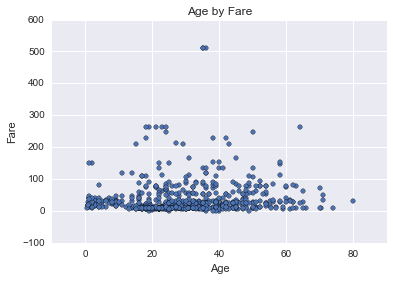

In [23]:
titanic_data.plot('Age', 'Fare', kind = 'scatter', title = 'Age by Fare')


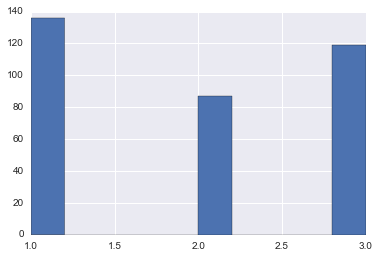

In [76]:
survived_df['Pclass'].hist()

### Conclusions:
1.	I find that more female passengers were saved than male. (more than half of the survivors were female.) 
    •	233 were female and 109 were male survivors.
2.  Only around 38% of the people survived. 
3.  
3.	There was no significance about the Class they were travelling in.
    Pclass Survived
    1    	136
    2     	87
    3    	119
4.	I also find that single passengers were among the most survivors. Passengers travelling with kids, parents or siblings or spouses were least of the total survivors. 
4.	Average survivor’s age is 28.3436896552. 
    It also does not show that elders or kids were among the most survivors.
